# y -> Whether the client has subscribed a term deposit or not  Binomial ("yes" or "no")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\logistic regression\\bank 1.csv")
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
# Display the first few rows of the dataset
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [10]:
# Summary statistics of numerical columns
print(df.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [11]:
# Check for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


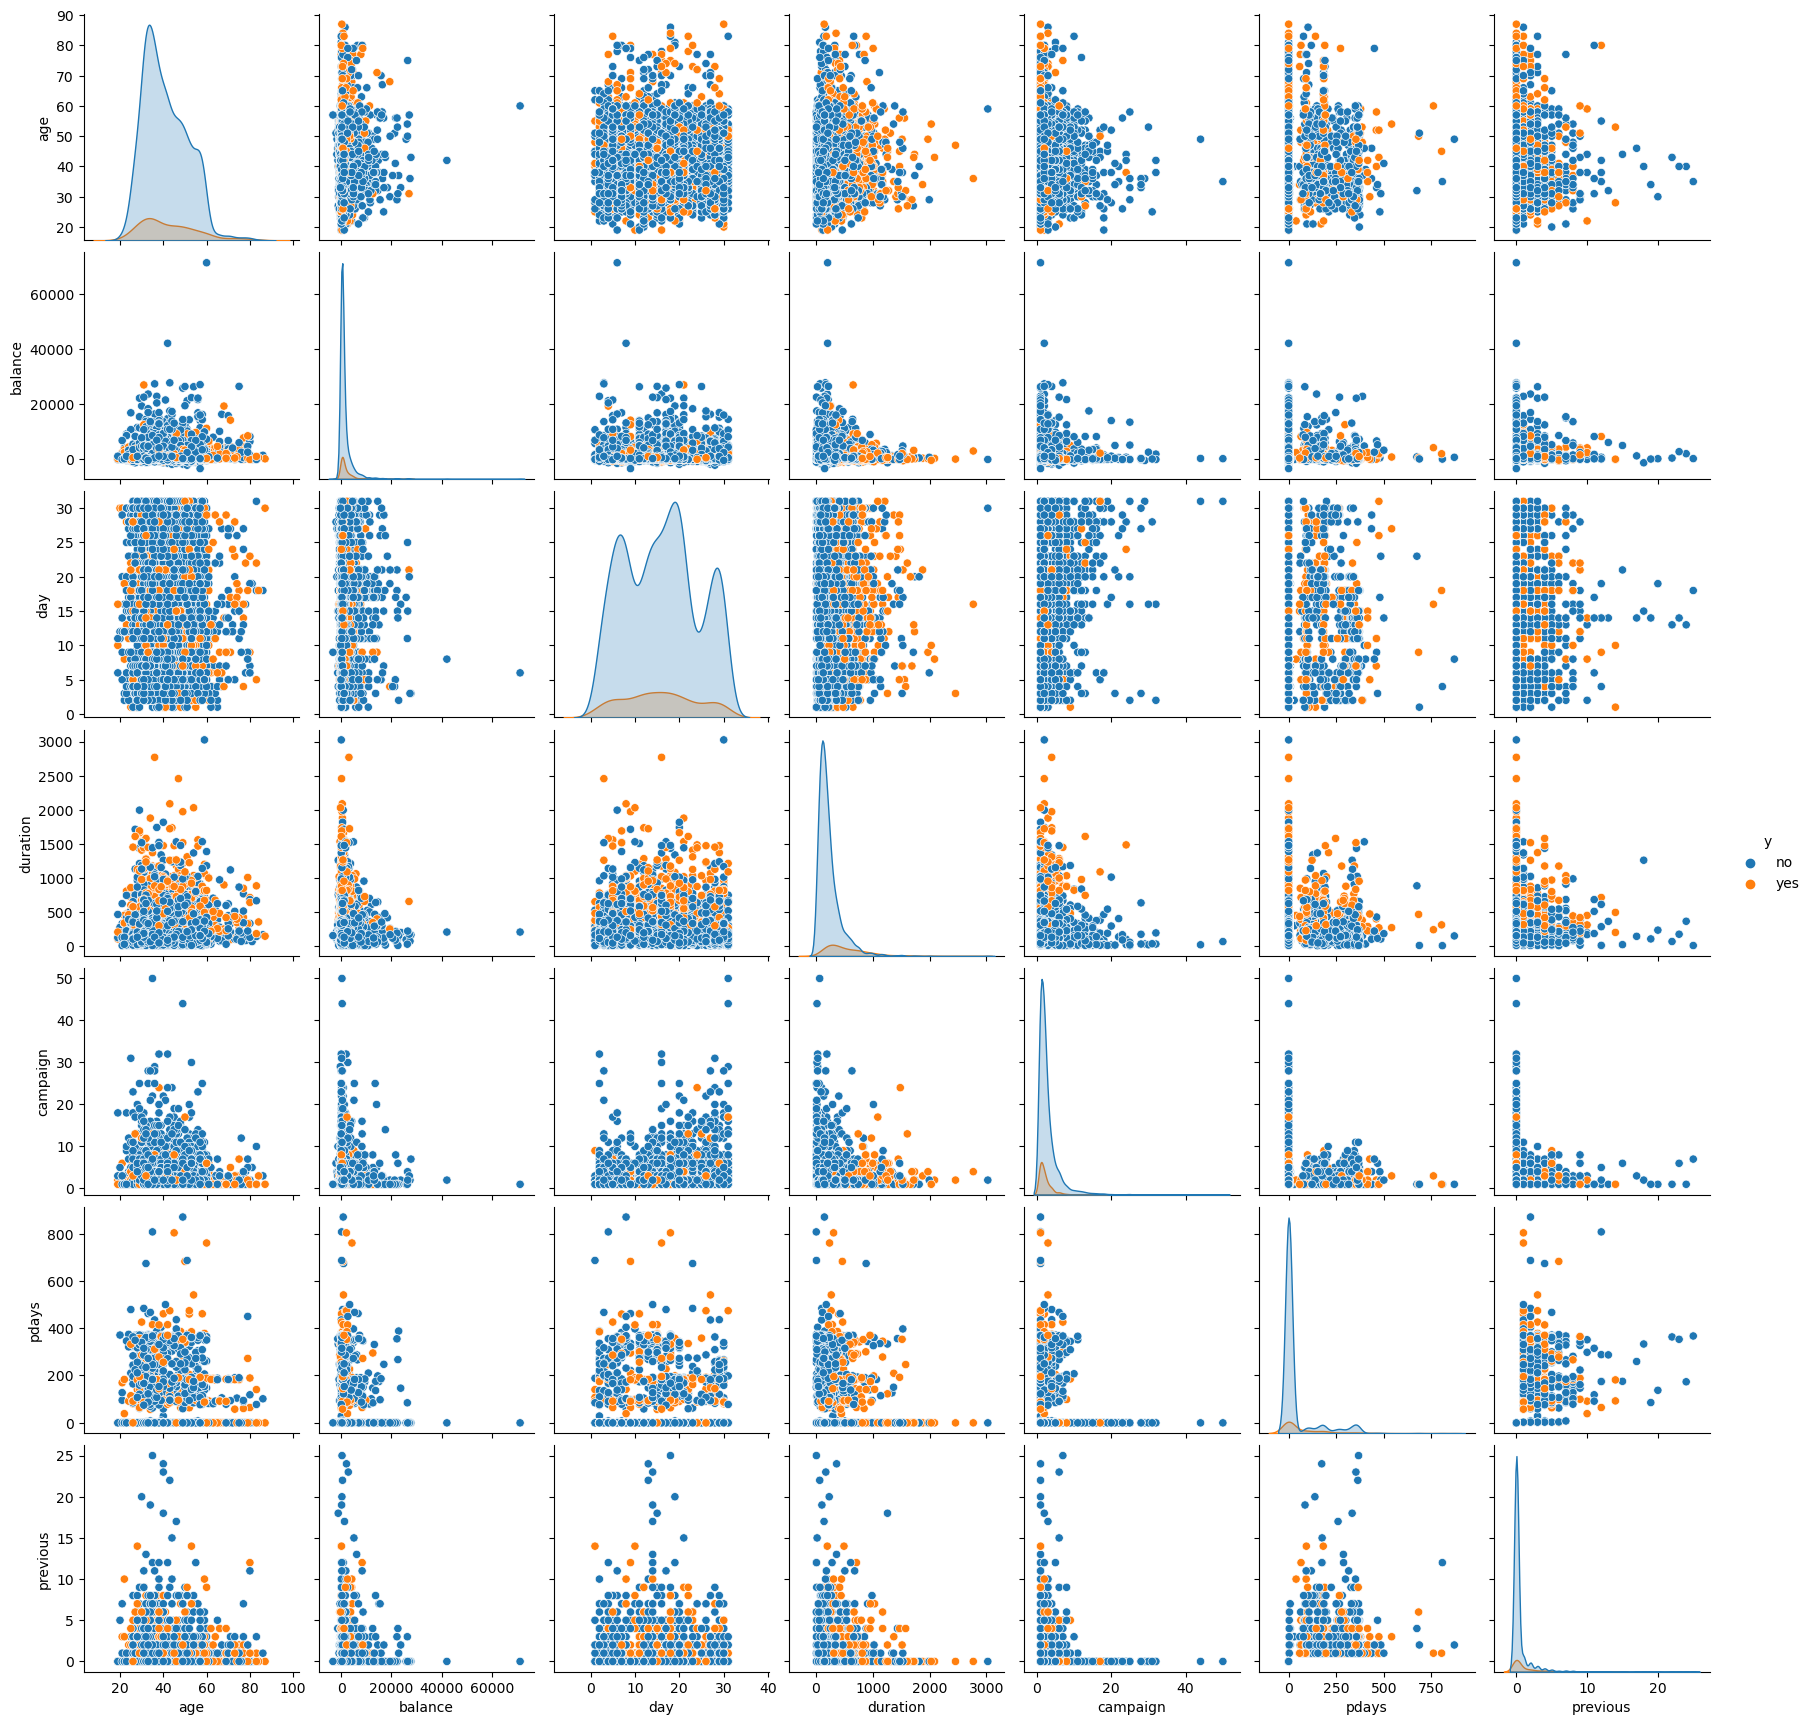

In [12]:
# Data Visualization

# Pairplot for numerical columns
sns.pairplot(df, hue='y')
plt.show()

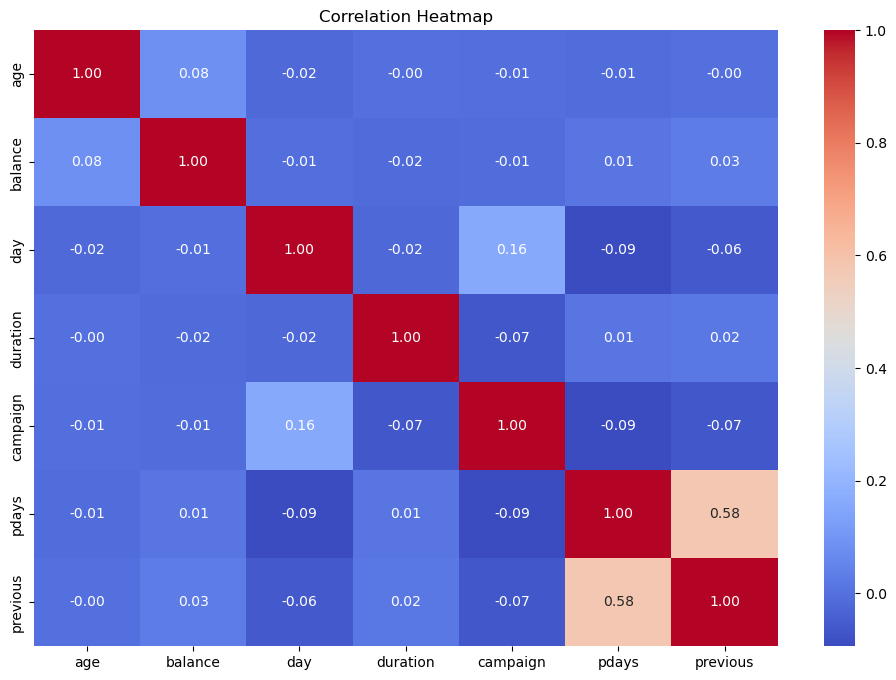

In [17]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [20]:

import numpy as np


# Display the initial shape of the dataset
print("Initial Shape:", df.shape)

# Handling missing values
data = df.dropna()  # This removes rows with any missing values

# Handling duplicates
df = df.drop_duplicates()

# Handling outliers (assuming you want to remove extreme values)
# You can use z-score or other methods depending on your data
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs((data[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Display the shape of the cleaned dataset
print("Cleaned Shape:", df_no_outliers.shape)

# Save the cleaned dataset if needed
# data_no_outliers.to_csv('cleaned_dataset.csv', index=False)


Initial Shape: (4521, 17)
Cleaned Shape: (3980, 17)


In [23]:
# using one-hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
df

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,False,False,...,False,False,False,False,False,True,False,False,False,True
1,33,4789,11,220,1,339,4,no,False,False,...,False,False,False,True,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,no,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,no,False,False,...,False,True,False,False,False,False,False,False,False,True
4,59,0,5,226,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,False,False,...,True,False,False,False,False,False,False,False,False,True
4517,57,-3313,9,153,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
4518,57,295,19,151,11,-1,0,no,False,False,...,False,False,False,False,False,False,False,False,False,True
4519,28,1137,6,129,4,211,3,no,True,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
#creating an interaction term
df['balance_duration_interaction'] = df['balance'] * df['duration']
df

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_duration_interaction
0,30,1787,19,79,1,-1,0,no,False,False,...,False,False,False,False,True,False,False,False,True,141173
1,33,4789,11,220,1,339,4,no,False,False,...,False,False,True,False,False,False,False,False,False,1053580
2,35,1350,16,185,1,330,1,no,False,False,...,False,False,False,False,False,False,False,False,False,249750
3,30,1476,3,199,4,-1,0,no,False,False,...,True,False,False,False,False,False,False,False,True,293724
4,59,0,5,226,1,-1,0,no,True,False,...,False,False,True,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,False,False,...,False,False,False,False,False,False,False,False,True,-109557
4517,57,-3313,9,153,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,True,-506889
4518,57,295,19,151,11,-1,0,no,False,False,...,False,False,False,False,False,False,False,False,True,44545
4519,28,1137,6,129,4,211,3,no,True,False,...,False,False,False,False,False,False,True,False,False,146673


In [25]:
# Example using pandas cut for binning age
df['age_bin'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])
df

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_duration_interaction,age_bin
0,30,1787,19,79,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,True,141173,20-30
1,33,4789,11,220,1,339,4,no,False,False,...,False,True,False,False,False,False,False,False,1053580,30-40
2,35,1350,16,185,1,330,1,no,False,False,...,False,False,False,False,False,False,False,False,249750,30-40
3,30,1476,3,199,4,-1,0,no,False,False,...,False,False,False,False,False,False,False,True,293724,20-30
4,59,0,5,226,1,-1,0,no,True,False,...,False,True,False,False,False,False,False,True,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,False,False,...,False,False,False,False,False,False,False,True,-109557,30-40
4517,57,-3313,9,153,1,-1,0,no,False,False,...,False,True,False,False,False,False,False,True,-506889,50-60
4518,57,295,19,151,11,-1,0,no,False,False,...,False,False,False,False,False,False,False,True,44545,50-60
4519,28,1137,6,129,4,211,3,no,True,False,...,False,False,False,False,False,True,False,False,146673,20-30


In [32]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame
df_selected = df.copy()

# Convert non-numeric columns to numeric using Label Encoding
non_numeric_columns = df_selected.select_dtypes(exclude=['int64', 'float64']).columns
for column in non_numeric_columns:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])

# Select top k features based on ANOVA F-value
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(df_selected.drop('y', axis=1), df_selected['y'])

# Get the selected feature names
selected_feature_indices = selector.get_support()
selected_feature_names = df_selected.drop('y', axis=1).columns[selected_feature_indices]

# Create a new DataFrame with selected features
df_selected = pd.DataFrame(X_selected, columns=selected_feature_names)
df_selected['y'] = df['y']


In [39]:
#Adjust Classification Threshold
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred_threshold = (y_prob > 0.4).astype(int)


In [35]:
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


In [37]:
#Resampling Technique
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.8)),
    ('model', LogisticRegression(random_state=42))
])

pipeline.fit(X_train_scaled, y_train)


Pipeline(steps=[('oversample', SMOTE(sampling_strategy=0.5)),
                ('undersample', RandomUnderSampler(sampling_strategy=0.8)),
                ('model', LogisticRegression(random_state=42))])

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you've already performed feature engineering and selected relevant features
# Let's use 'df_selected' as the DataFrame with selected features

# Split the data into features (X) and target variable (y)
X = df_selected.drop('y', axis=1)
y = df_selected['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with class_weight parameter
# 'balanced' automatically adjusts weights based on the number of samples in each class
model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.8442

Confusion Matrix:
[[687 120]
 [ 21  77]]

Classification Report:
              precision    recall  f1-score   support

          no       0.97      0.85      0.91       807
         yes       0.39      0.79      0.52        98

    accuracy                           0.84       905
   macro avg       0.68      0.82      0.71       905
weighted avg       0.91      0.84      0.87       905



In [45]:
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score

In [50]:
from sklearn.metrics import roc_auc_score

# Assuming 'model' is your trained logistic regression model
# Get predicted probabilities for the positive class
y_pred = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 0.91


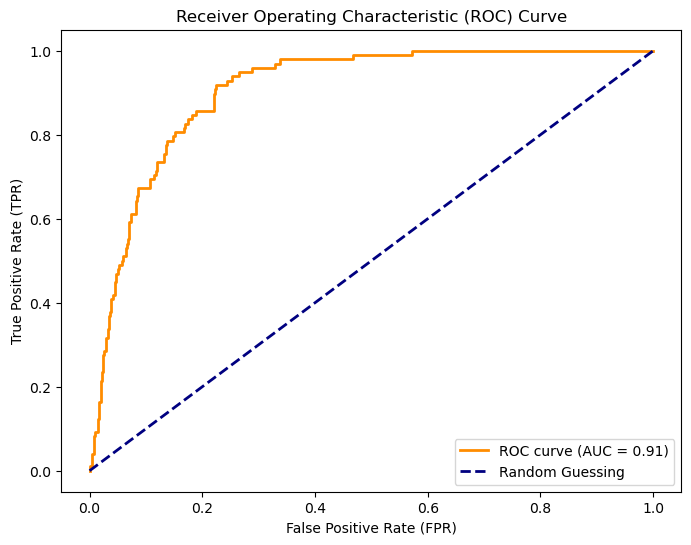

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert string labels to binary format
y_test_binary = (y_test == 'yes').astype(int)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
